# Mini-projeto-Kmeans-K-prototypes-DBSCAN


## Grupo
* Amanda Cristina (acfml)
* João Marcos (jmav)
* Mateus Galdino (mglg)
* Matheus Augusto (mams4)
* Rodrigo Rossiter Ladvocat Cintra (rrlc)

## Visão Geral do Projeto
Este notebook documenta o desenvolvimento de um modelo de Machine Learning para realizar a divisão dos dados em clusters, comparando entre os algoritmos K-Means, K-Prototypes e DBSCAN.

### Objetivos Específicos
- **Análise Exploratória:** Investigar o dataset para extrair insights e compreender as relações entre as variáveis.
- **Engenharia de Atributos:** Realizar o tratamento de dados faltantes, a codificação de variáveis categóricas (como 'sexo' e 'porto de embarque') e a normalização de variáveis numéricas.
- **Definir o valor de k:** As métricas Elbow, Calinski-Harabasz, Davies-Bouldin, Silhouette e BIC devem ser usadas para
indicar o melhor valor de k.
- **Determinar clusters:** Definir os clusters por meio de algoritmos não-supervisionados: K-Means + K-Prototypes + DBSCAN.

### Metodologia Aplicada
A abordagem será dividida nas seguintes fases:
1.  **Carregamento e Análise dos Dados:** Importação das bibliotecas e do dataset, seguida por uma exploração inicial.
2.  **Pré-processamento:** Limpeza e transformação dos dados para garantir que estejam prontos para o treinamento.
3.  **Divisão dos dados em cluster:** Dividir dados em clusters usando os diferentes algoritmos.
4.  **Avaliação e Conclusão:** Analisar quais as características principais em cada cluster, destribuição de variáveis em cada cluster.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.6 MB/s eta 0:00:00


In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install scipy

In [ ]:
!pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import optuna
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from prince import FAMD
from prince import MCA
from kmodes.kprototypes import KPrototypes
from scipy.spatial.distance import pdist, squareform

## **Parte 1 - Análise dos Dados**

O dataset utilizado é o da base de dados do kaggle **"Titanic - Machine Learning from Disaster"**, que é um conjunto de dados clássico, amplamente utilizado para o ensino e prática de técnicas de **aprendizado de máquina**.

Ele contém informações detalhadas sobre os passageiros a bordo do **RMS Titanic**, que naufragou em sua viagem inaugural em 1912.

Entre as variáveis disponíveis estão:

- **PassengerId** – Identificador único de cada passageiro  
- **Survived** – Variável alvo: indica se o passageiro sobreviveu ("1") ou não ("0")  
- **Pclass** – Classe do bilhete (1ª, 2ª ou 3ª classe)  
- **Name** – Nome completo do passageiro  
- **Sex** – Gênero do passageiro ("male" ou "female")  
- **Age** – Idade do passageiro em anos  
- **SibSp** – Número de irmãos/cônjuges a bordo  
- **Parch** – Número de pais/filhos a bordo  
- **Ticket** – Número do bilhete  
- **Fare** – Tarifa paga pelo bilhete  
- **Cabin** – Número da cabine (muitos valores ausentes)  
- **Embarked** – Porto de embarque ("C" = Cherbourg, "Q" = Queenstown, "S" = Southampton)

A **variável alvo** é "Survived", que indica se um passageiro **sobreviveu** ("1") ou **não sobreviveu** ("0") ao desastre.Contudo,ela foi desconsiderada neste projeto, pois foram aplicados exclusivamente algoritmos de aprendizagem não supervisionada, que não utilizam uma variável alvo.

https://www.kaggle.com/c/titanic/data

### Importando Dados

In [ ]:
url_train = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/train.csv'
url_test = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/test.csv'

# Leitura dos datasets
train_set = pd.read_csv(url_train)
test_set = pd.read_csv(url_test)

In [ ]:
# retirar a coluna de label
train_set = train_set.drop(['Survived'], axis=1)

### Conjunto dos dados de treino e teste

In [ ]:
print("Train Set:")
display(train_set)

print("Test Set:")
display(test_set)

Train Set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Test Set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_set.shape

(891, 11)

In [ ]:
train_set.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
# Variáveis numéricas
numeric_features = train_set.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Variáveis categóricas
catagoric_features = train_set.select_dtypes(exclude=np.number)
catagoric_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

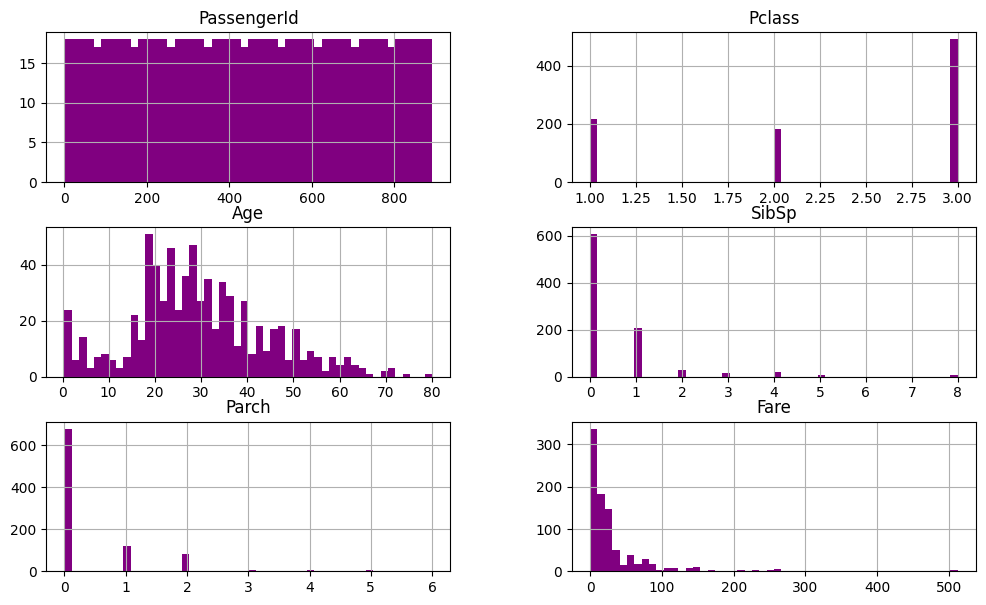

In [ ]:
train_set.hist(bins=50, figsize=(12, 7), color='purple')
plt.show()

### Correlação entre Variáveis

A análise de correlação é uma etapa essencial na exploração de dados, especialmente em problemas não supervisionados, pois permite identificar o grau de relacionamento entre diferentes variáveis do conjunto. Esse tipo de análise ajuda a compreender como as variáveis estão interconectadas e pode revelar padrões estruturais relevantes nos dados.

Correlações mais fortes podem indicar redundância, dependência ou agrupamentos naturais entre variáveis, sendo úteis para decisões. No contexto da análise não supervisionada, como na aplicação de algoritmos de clustering (por exemplo, K-Means ou DBSCAN), entender essas relações auxilia na definição de grupos mais coerentes, melhorando a segmentação dos dados em clusters com características similares.

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000


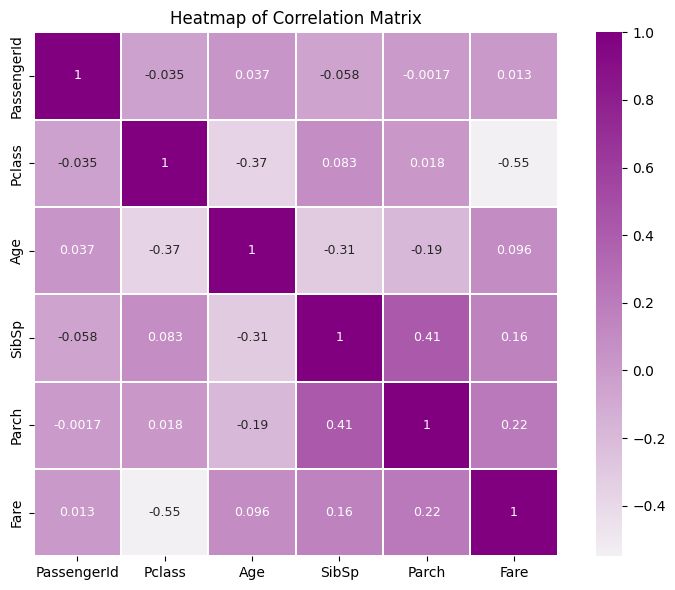

In [ ]:
correlation = numeric_features.corr()

# Apenas exibe a matriz inteira
print(correlation)

# Mapa de calor
cmap = sns.light_palette('purple', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()

### Dados faltantes
#### A coluna Age apresenta 177 valores faltantes, indicando que uma quantidade significativa de passageiros não teve sua idade registrada. A coluna Cabin é a que apresenta o maior número de dados ausentes, com 687 valores faltantes, sugerindo que muitas cabines não foram registradas ou os passageiros não tinham uma cabine específica. A coluna Embarked possui apenas 2 valores faltantes, mostrando que a maioria dos passageiros tem o porto de embarque registrado.

In [ ]:
missing = train_set.isnull().sum()
print(missing)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


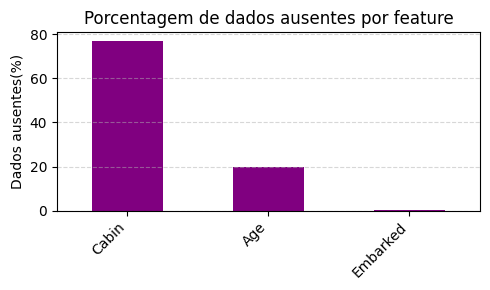

In [ ]:
missing = train_set.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(5, 3))
missing.plot(kind='bar', color='purple')
plt.ylabel('Dados ausentes(%)')
plt.title('Porcentagem de dados ausentes por feature')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Outliers

 Tratando Outliers

Outliers são pontos muito fora da curva (ex: o salário de um diretor vs. o de um estagiário).

 Por que se importar?

* Eles bagunçam a **média**.
* Eles confundem alguns modelos (como Redes Neurais), fazendo-os errar mais.


> Cuidar dos outliers cria um modelo mais confiável.

In [ ]:
def contar_outliers_iqr(df):
    """Calcula a quantidade de outliers para cada coluna numérica de um DataFrame."""
    outliers_dict = {}
    # Itera apenas sobre as colunas numéricas
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outliers_dict[col] = outlier_count

    return outliers_dict



In [ ]:
outliers = contar_outliers_iqr(train_set)

for key, value in outliers.items():
  print(f'{key}: {value}')

PassengerId: 0
Pclass: 0
Age: 11
SibSp: 46
Parch: 213
Fare: 116


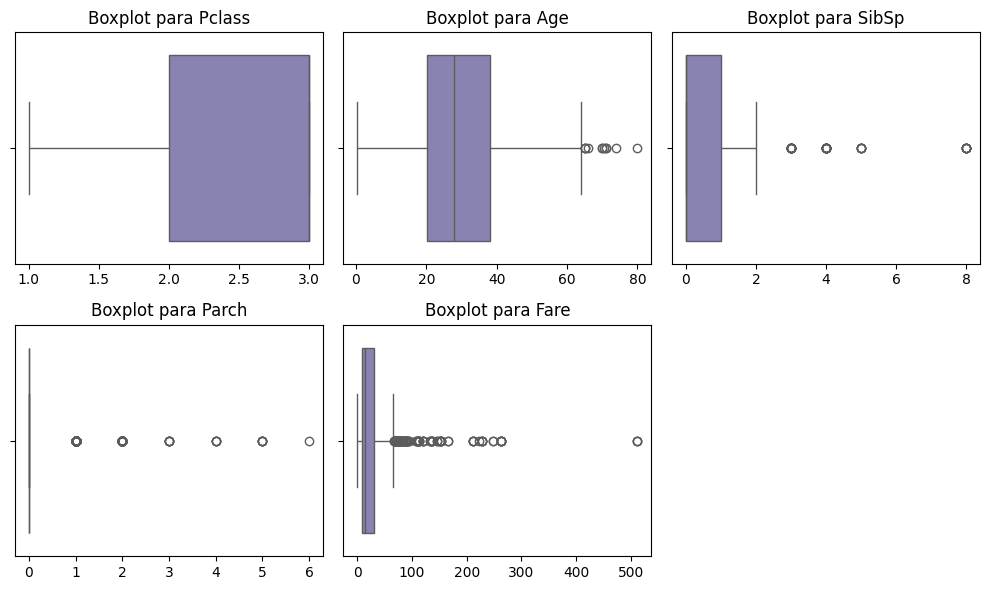

In [ ]:
# Lista de colunas que você deseja plotar ('Survived' foi removida)
cols_to_plot = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Cria a figura e a grade de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
flat_axes = axes.flatten()

# pega a cor da biblioteca
purple_color = sns.color_palette("Purples_d")[2]

# Itera sobre os eixos e colunas para criar os gráficos
for i, col in enumerate(cols_to_plot):
    ax = flat_axes[i]
    sns.boxplot(x=train_set[col], ax=ax, color=purple_color, whis=1.5)
    ax.set_title(f'Boxplot para {col}')
    ax.set_xlabel('')

# Esconde os eixos que não foram utilizados
for i in range(len(cols_to_plot), len(flat_axes)):
    flat_axes[i].set_visible(False)

# Ajusta o layout para que os títulos e gráficos não se sobreponham
plt.tight_layout()
plt.show()

## **Parte 2 - Pré-processamento de Dados**

Removendo campos nome, id, número da cabine e ticket. Esses dados não serão utilizados no treinamento.
Como grande parte dos valores da cabine não estão presentes, não faz sentido completar esses dados.

In [ ]:
dataset = train_set.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1)
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Codificação do gênero usando o Label Encoder dado que é binário

### Tratamento de Outliers

In [ ]:
def tratar_features_numericas(df):
    """Aplica os tratamentos de outliers e transformações em um DataFrame."""
    df_tratado = df.copy()

    if 'Fare' in df_tratado.columns:
        df_tratado['Fare'] = np.log1p(df_tratado['Fare'])

    return df_tratado

In [ ]:
dataset = tratar_features_numericas(dataset)


In [ ]:
le_sex = LabelEncoder()
dataset['Sex'] = le_sex.fit_transform(dataset['Sex'].astype(str))

### Dados Ausentes

É necessário completar os valores ausentes da idade, dado que é uma feature relevante para ser excluída do treinamento. A coluna idade apresenta 20% de valores ausentes. Também é preciso *completar* o local de embarque com a moda dos valores. Visto que é uma dado categórico.

In [ ]:
# Imputação na coluna 'Age' utilizando KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset['Age'] = imputer.fit_transform(dataset[['Age']])

In [ ]:
# Imputação para a coluna 'Embarked' através de um treinamento, como é uma categoria não é possível usar KNNImputer
dataset_imp = dataset.copy()
dataset_imp.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,S
1,1,0,38.0,1,0,4.280593,C
2,3,0,26.0,0,0,2.188856,S
3,1,0,35.0,1,0,3.990834,S
4,3,1,35.0,0,0,2.202765,S


In [ ]:
# Treinando com base nas outras features
train_imp = dataset_imp.dropna()
test_imp = dataset_imp[dataset_imp.isna().any(axis=1)]

In [ ]:
# Separar X e y
X_train_imp = train_imp.drop('Embarked', axis = 1)
y_train_imp = train_imp['Embarked']
X_test_imp = test_imp.drop('Embarked', axis = 1)

In [ ]:
# Encoding no y_train
le = LabelEncoder()
y_train_imp = le.fit_transform(y_train_imp)

In [ ]:
# aplicar feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_imp = sc.fit_transform(X_train_imp)
X_test_imp = sc.transform(X_test_imp)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_imp, y_train_imp)

KNeighborsClassifier()

In [ ]:
y_pred_imp = classifier.predict(X_test_imp)

In [ ]:
y_test_original = le.inverse_transform(y_pred_imp)
print(y_test_original)

['C' 'C']


In [ ]:
test_imp.loc[test_imp.index, 'Embarked'] = y_test_original
test_imp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,0,38.0,0,0,4.394449,C
829,1,0,62.0,0,0,4.394449,C


In [ ]:
# desfazendo feature scaling
X_train_imp = sc.inverse_transform(X_train_imp)
X_test_imp = sc.inverse_transform(X_test_imp)
dataset_completed = pd.concat([train_imp, test_imp], axis = 0)

In [ ]:
# Atualizando dataset original
dataset = dataset_completed.copy()

###Codificação de Atributos



In [ ]:
# salvando o dataset original após completar dados
dataset_original = dataset.copy()
coluna_codificada = dataset_original['Sex']
coluna_decodificada = le_sex.inverse_transform(coluna_codificada)
dataset_original['Sex'] = coluna_decodificada
print(dataset_original)

     Pclass     Sex        Age  SibSp  Parch      Fare Embarked
0         3    male  22.000000      1      0  2.110213        S
1         1  female  38.000000      1      0  4.280593        C
2         3  female  26.000000      0      0  2.188856        S
3         1  female  35.000000      1      0  3.990834        S
4         3    male  35.000000      0      0  2.202765        S
..      ...     ...        ...    ...    ...       ...      ...
888       3  female  29.699118      1      2  3.196630        S
889       1    male  26.000000      0      0  3.433987        C
890       3    male  32.000000      0      0  2.169054        Q
61        1  female  38.000000      0      0  4.394449        C
829       1  female  62.000000      0      0  4.394449        C

[891 rows x 7 columns]


Codificação usando OneHotEncoder para o porto de embarque

In [ ]:
cat_col = dataset.columns[-1]

# aplica o OneHot na última coluna
ohe = OneHotEncoder(sparse_output=False)
onehot_array = ohe.fit_transform(dataset[[cat_col]])
onehot_df = pd.DataFrame(onehot_array, columns=ohe.get_feature_names_out([cat_col]))

# remove a coluna categórica original e adiciona as novas
dataset= dataset.drop(columns=[cat_col]).reset_index(drop=True)
dataset= pd.concat([dataset, onehot_df], axis=1)
# Encoding no y_train
l = LabelEncoder()
y_train_imp = le.fit_transform(y_train_imp)

### Normalização dos dados

In [ ]:
X = dataset.iloc[:, :].values

In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## K-Means

### Determinando número ótimo de *clusters*

In [ ]:
# Somente variáveis numéricas, pois O K-means utiliza a distância euclidiana
X_kmeans = X[:, 2:6]
print(X_kmeans)

[[0.27117366 0.125      0.         0.33812548]
 [0.4722292  0.125      0.         0.68589165]
 [0.32143755 0.         0.         0.3507267 ]
 ...
 [0.39683338 0.         0.         0.34755367]
 [0.4722292  0.         0.         0.70413513]
 [0.77381252 0.         0.         0.70413513]]


In [ ]:
# faixas de k para testar
k_range = range(2, 11)  # começa em 2 (não faz sentido silhouette com k=1)

# métricas
wcss = []
silhouette = []
calinski = []
davies = []
bic = []

for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_kmeans)

    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_kmeans, labels))
    calinski.append(calinski_harabasz_score(X_kmeans, labels))
    davies.append(davies_bouldin_score(X_kmeans, labels))

    # BIC com GaussianMixture
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_kmeans)
    bic.append(gmm.bic(X_kmeans))

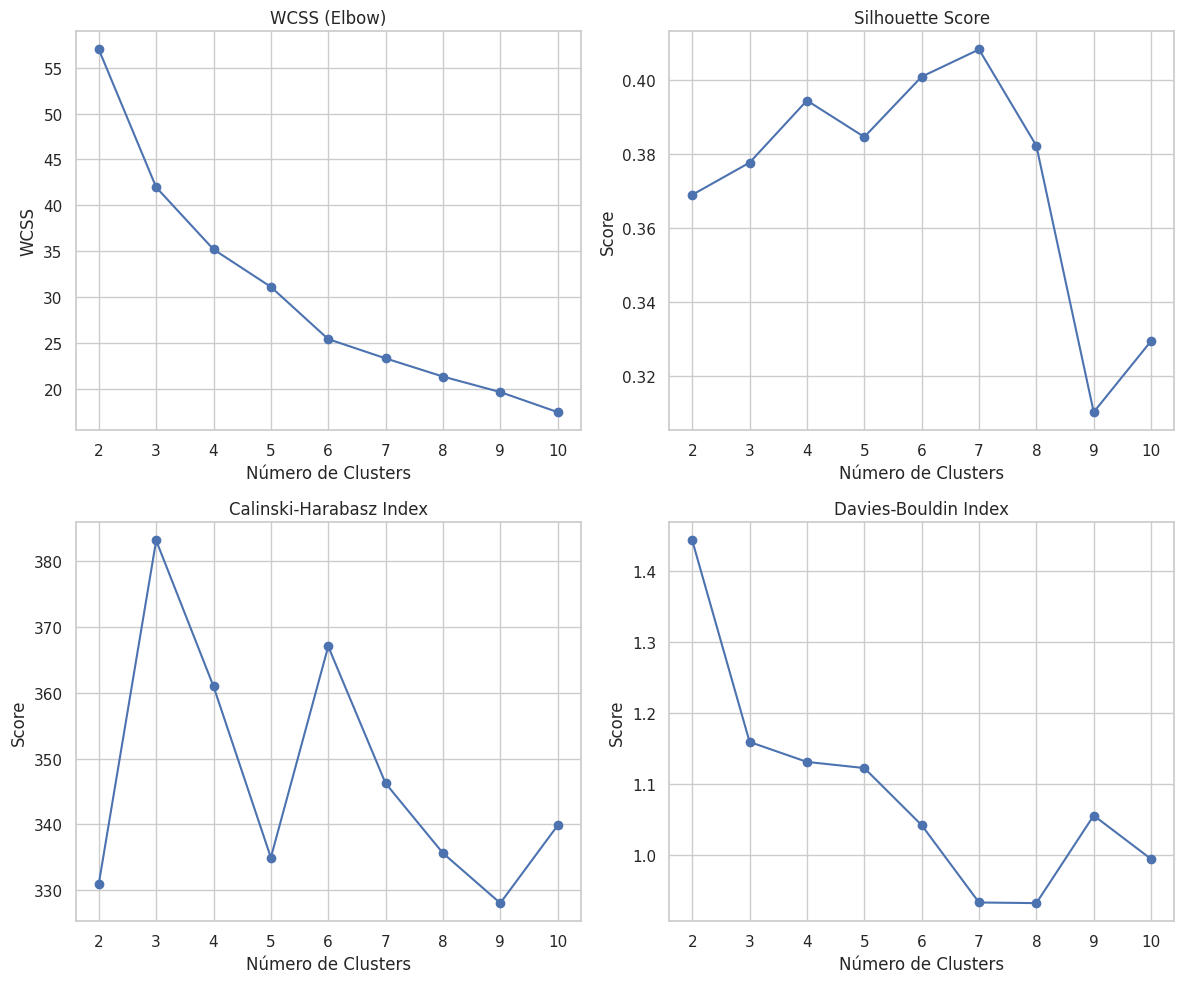

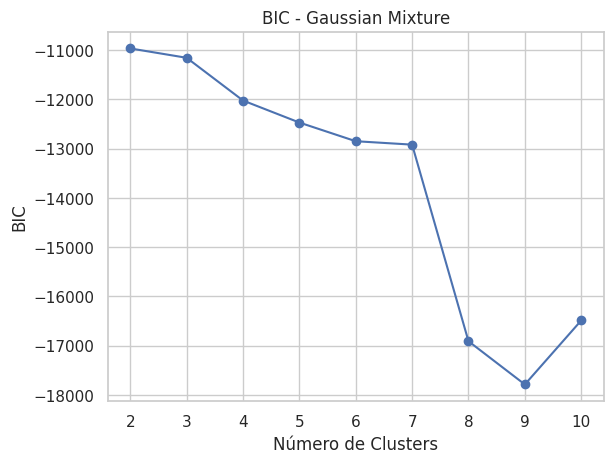

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# WCSS (cotovelo)
plt.subplot(2, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('WCSS (Elbow)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

# Silhouette
plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')

# Calinski-Harabasz
plt.subplot(2, 2, 3)
plt.plot(k_range, calinski, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')

# Davies-Bouldin (quanto menor, melhor)
plt.subplot(2, 2, 4)
plt.plot(k_range, davies, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# BIC separado (opcional)
plt.figure()
plt.plot(k_range, bic, marker='o')
plt.title('BIC - Gaussian Mixture')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC')
plt.show()


De forma geral a maioria dos gráficos nos indica que uma bom número de clusters é  **k = 7**.


### Aplicando PCA com n_components = 2

In [ ]:
# Redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

In [ ]:
# Criando um DataFrame com a importância das variáveis
feature_names =  ['Age', 'SibSp', 'Parch', 'Fare']
importancia = pd.DataFrame(
    data=pca.components_,
    columns=feature_names,
    index=[f'PC{i+1}' for i in range(2)]
)

print("Contribuição das variáveis em cada Componente Principal:")
print(importancia.T)

# Variância explicada por componente
print("\nVariância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")

Contribuição das variáveis em cada Componente Principal:
            PC1       PC2
Age   -0.375889  0.827591
SibSp  0.555935 -0.017234
Parch  0.518735  0.047302
Fare   0.529677  0.559069

Variância explicada por cada componente:
PC1: 41.21%
PC2: 32.25%


In [ ]:
# Treinamento do K-Means
kmeans = KMeans(n_clusters=7)
y_kmeans = kmeans.fit_predict(X_pca)

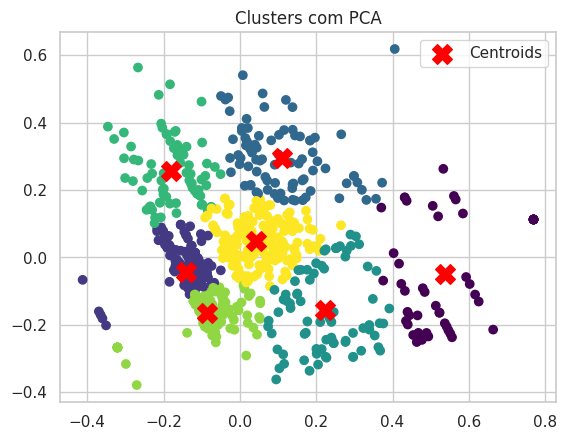

In [ ]:
# Visualização dos clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title('Clusters com PCA')
plt.legend()
plt.show()

### Distribuição dos clusters

/tmp/ipython-input-3525961562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clusters, x='cluster', palette='tab20')


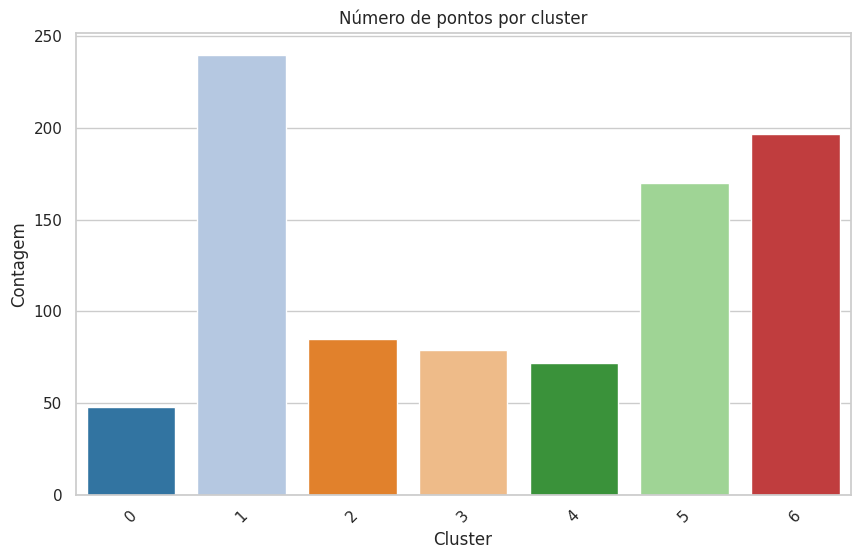

In [ ]:
df_clusters = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_clusters['cluster'] = y_kmeans
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clusters, x='cluster', palette='tab20')
plt.title('Número de pontos por cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

### Média do valor das Features por Cluster

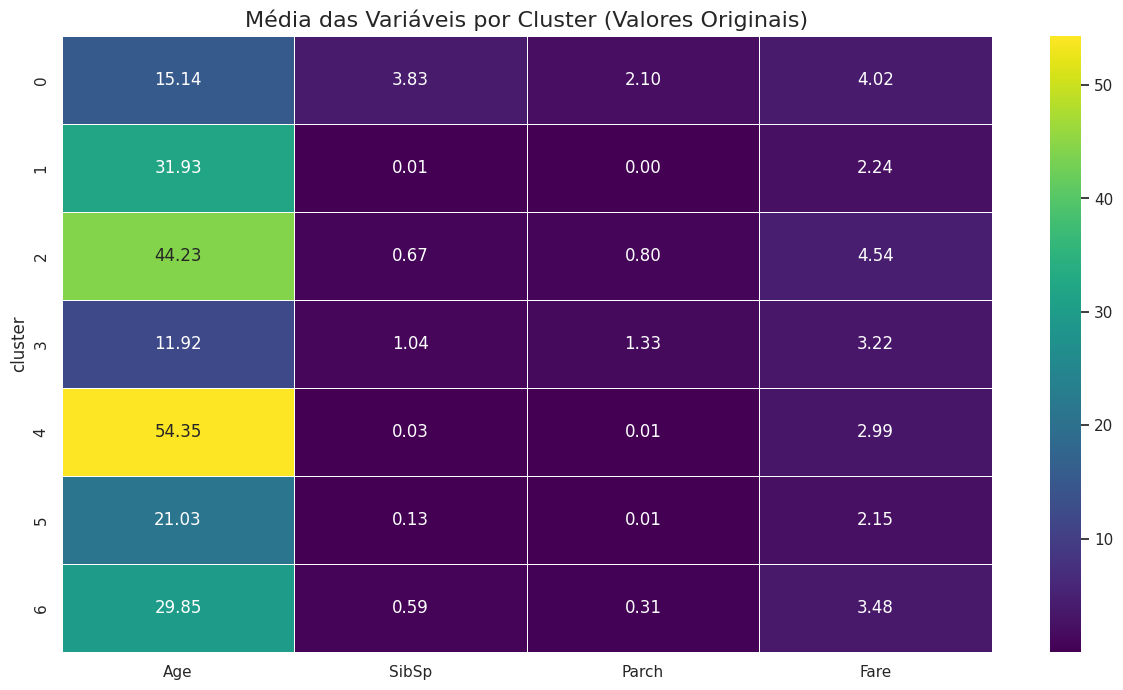

In [ ]:
dados_originais_com_clusters = dataset.iloc[:, 2:6].copy()
dados_originais_com_clusters['cluster'] = y_kmeans
cluster_means = dados_originais_com_clusters.groupby('cluster').mean()

# Plotar o Heatmap
plt.figure(figsize=(15, 8))

# Heatmap das médias
sns.heatmap(
    cluster_means,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    linewidths=.5
)

plt.title('Média das Variáveis por Cluster (Valores Originais)', fontsize=16)
plt.show()

### Distância intra e inter cluster

In [ ]:
# Distância intra-cluster (média das distâncias dos pontos ao centro)
intra_distances = []

for i in range(kmeans.n_clusters):
    # Seleciona os pontos do cluster atual
    cluster_points = X_pca[y_kmeans == i]
    centroid = kmeans.cluster_centers_[i]

    # Calcula a distância euclidiana de cada ponto ao centróide
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    mean_distance = distances.mean()
    intra_distances.append(mean_distance)

# Exibe resultados
print("\n--- Distâncias Intra-cluster ---")
for i, dist in enumerate(intra_distances):
    print(f"Cluster {i}: {dist:.4f}")



--- Distâncias Intra-cluster ---
Cluster 0: 0.1836
Cluster 1: 0.0514
Cluster 2: 0.1260
Cluster 3: 0.1359
Cluster 4: 0.1075
Cluster 5: 0.0585
Cluster 6: 0.0846


In [ ]:
centroids = kmeans.cluster_centers_
dist_matrix = squareform(pdist(centroids))

# Matriz formatada para visualização
df_dist_matrix = pd.DataFrame(dist_matrix,
                              columns=[f'C{i}' for i in range(kmeans.n_clusters)],
                              index=[f'C{i}' for i in range(kmeans.n_clusters)])

print("\n--- Matriz de Distâncias Inter-cluster ---")
print(df_dist_matrix.round(4))


--- Matriz de Distâncias Inter-cluster ---
        C0      C1      C2      C3      C4      C5      C6
C0  0.0000  0.6775  0.5485  0.3310  0.7806  0.6349  0.5045
C1  0.6775  0.0000  0.4215  0.3805  0.3031  0.1327  0.2038
C2  0.5485  0.4215  0.0000  0.4643  0.2939  0.5009  0.2570
C3  0.3310  0.3805  0.4643  0.0000  0.5772  0.3107  0.2719
C4  0.7806  0.3031  0.2939  0.5772  0.0000  0.4322  0.3059
C5  0.6349  0.1327  0.5009  0.3107  0.4322  0.0000  0.2487
C6  0.5045  0.2038  0.2570  0.2719  0.3059  0.2487  0.0000


## K-Prototypes

O K-Prototypes permite usar dados numéricos e categóricos

### Determinando o número ótimo de Clusters

In [ ]:
colunas_numericas = ['Age', 'SibSp', 'Parch', 'Fare']
colunas_categoricas = ['Pclass', 'Sex', 'Embarked']

# Cria uma cópia e processa os dados
df_processado = dataset_original.copy()

# Normaliza as colunas numéricas
scaler = MinMaxScaler()
df_processado[colunas_numericas] = scaler.fit_transform(df_processado[colunas_numericas])

# Codifica as colunas categóricas
for col in colunas_categoricas:
    df_processado[col] = LabelEncoder().fit_transform(df_processado[col])

print(df_processado.head())

   Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       2    1  0.271174  0.125    0.0  0.338125         2
1       0    0  0.472229  0.125    0.0  0.685892         0
2       2    0  0.321438  0.000    0.0  0.350727         2
3       0    0  0.434531  0.125    0.0  0.639463         2
4       2    1  0.434531  0.000    0.0  0.352955         2


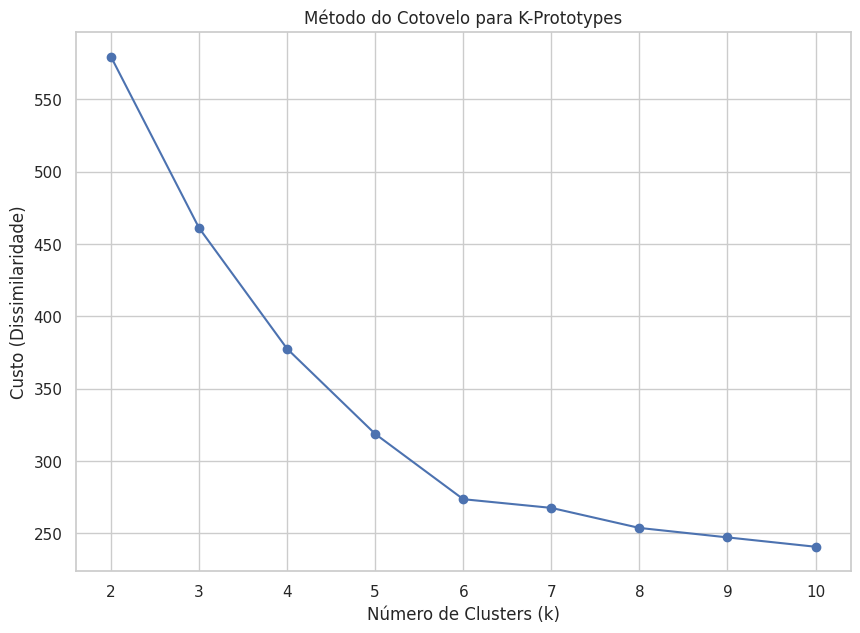

In [ ]:
# Prepara os inputs para o K-Prototypes
X_final = df_processado[colunas_numericas + colunas_categoricas].values
indices_categoricos = [df_processado.columns.get_loc(col) for col in colunas_categoricas]

# Calcula o custo para diferentes valores de k (Método do Cotovelo)
k_range = range(2, 11)
cost_values = []
for k in k_range:
    kproto = KPrototypes(n_clusters=k, random_state=42)
    kproto.fit(X_final, categorical=indices_categoricos)
    cost_values.append(kproto.cost_)

# Plota o gráfico para análise visual do 'k' ideal
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")
plt.plot(k_range, cost_values, marker='o')
plt.title('Método do Cotovelo para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Custo (Dissimilaridade)')
plt.xticks(k_range)
plt.show()

###  Aplicando FAMD com n_components = 2

Para reduzir a dimensionalidade de um dataset que contém tanto variáveis numéricas (como `Age` e `Fare`) quanto categóricas (`Pclass`, `Sex`), o PCA por si só não é a ferramenta adequada, pois ele é projetado para funcionar exclusivamente com dados numéricos.

É aqui que o **FAMD (Factor Analysis of Mixed Data)** se destaca. Ele é uma generalização do PCA, projetado especificamente para dados mistos. Em vez de analisar apenas um tipo de dado, o FAMD cria componentes "híbridos" que são uma síntese da variância das variáveis numéricas e da inércia (a "variância" das categorias) das variáveis categóricas.

Ao aplicar `FAMD(n_components=2)`, estamos pedindo ao algoritmo para encontrar os dois eixos principais que melhor resumem a estrutura completa e conjunta do nosso dataset, considerando todas as suas variáveis de forma equilibrada.

Reduzindo a dimensionalidade com FAMD...
Criando o gráfico...


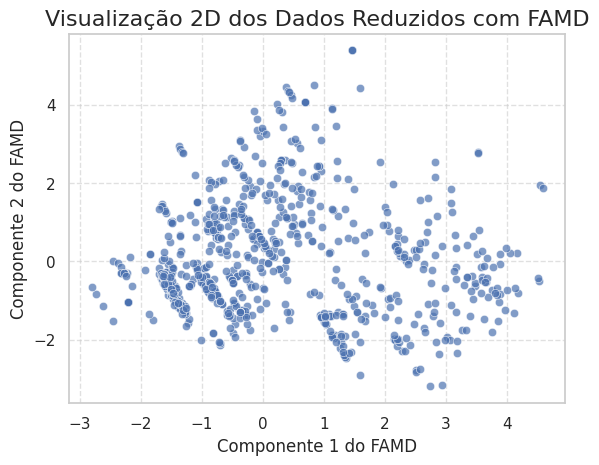

In [ ]:
# --- PASSO 0: Garantir que os Dados sejam um DataFrame ---
# Esta etapa é crucial para que a biblioteca FAMD funcione corretamente.
# Assumindo que X_final é um array NumPy e as listas de colunas estão definidas.
todas_colunas = colunas_numericas + colunas_categoricas
X_final_df = pd.DataFrame(X_final, columns=todas_colunas)


# --- PASSO 1: fazer a Redução de Dimensionalidade com FAMD ---
print("Reduzindo a dimensionalidade com FAMD...")
famd = FAMD(
    n_components=2,      # Queremos 2 dimensões para o gráfico
    random_state=42
)
# O FAMD aprende e transforma os dados em 2 componentes
df_famd = famd.fit_transform(df_processado)


# --- PASSO 2: Criar a Visualização ---
print("Criando o gráfico...")
plt.figure()

# O resultado do .fit_transform do FAMD nomeia as colunas como 0 e 1
sns.scatterplot(
    data=df_famd,
    x=0,  # Componente 1 do FAMD
    y=1,  # Componente 2 do FAMD
    alpha=0.7
)

plt.title('Visualização 2D dos Dados Reduzidos com FAMD', fontsize=16)
plt.xlabel('Componente 1 do FAMD', fontsize=12)
plt.ylabel('Componente 2 do FAMD', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

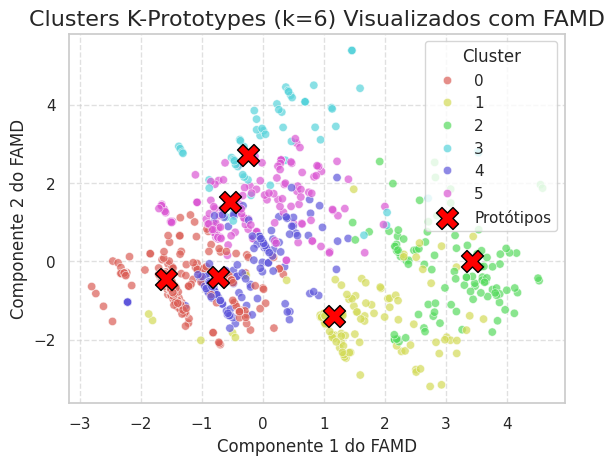

In [ ]:
todas_colunas = colunas_numericas + colunas_categoricas
X_final_df = pd.DataFrame(df_processado, columns=todas_colunas)

famd = FAMD(
    n_components=2,
    random_state=42
)
df_famd = famd.fit_transform(X_final_df)

indices_categoricos = [X_final_df.columns.get_loc(col) for col in colunas_categoricas]

kproto = KPrototypes(
    n_clusters=6,
    random_state=42
)
clusters = kproto.fit_predict(X_final_df.values, categorical=indices_categoricos)

df_famd['cluster'] = clusters

prototypes_high_dim = kproto.cluster_centroids_
prototypes_df = pd.DataFrame(prototypes_high_dim, columns=todas_colunas)
prototypes_2d = famd.transform(prototypes_df)

plt.figure()

sns.scatterplot(
    data=df_famd,
    x=0,
    y=1,
    hue='cluster',
    palette=sns.color_palette("hls", 6),
    alpha=0.7,
    legend='full'
)

plt.scatter(
    x=prototypes_2d[0], y=prototypes_2d[1],
    marker='X', s=250, c='red', edgecolor='black', label='Protótipos'
)

plt.title(f'Clusters K-Prototypes (k=6) Visualizados com FAMD', fontsize=16)
plt.xlabel('Componente 1 do FAMD', fontsize=12)
plt.ylabel('Componente 2 do FAMD', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Distribuição dos Clusters

/tmp/ipython-input-2117503242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


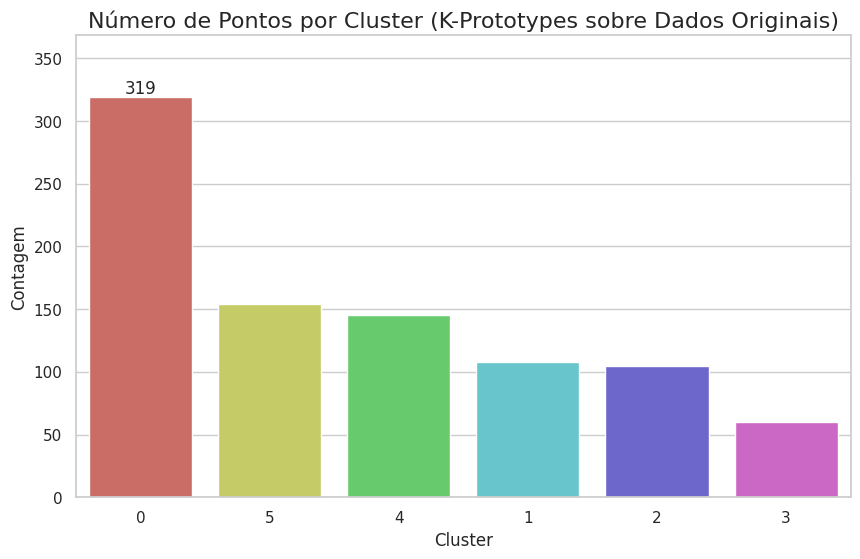

In [ ]:
# 1. Criar um DataFrame simples contendo os rótulos dos clusters corretos.
df_contagem = pd.DataFrame({'cluster': clusters})

# 2. Criar o gráfico de contagem (countplot).
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_contagem,
    x='cluster',
    palette='hls', # Usando a mesma paleta de cores do seu gráfico de dispersão
    order = df_contagem['cluster'].value_counts().index # Ordena as barras da maior para a menor
)

# Adiciona os números no topo de cada barra para clareza
ax.bar_label(ax.containers[0])

# 3. Adicionar títulos e rótulos.
plt.title('Número de Pontos por Cluster (K-Prototypes sobre Dados Originais)', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.ylim(0, ax.get_ylim()[1] * 1.1)
plt.show()

### Média do valor das Features por Cluster

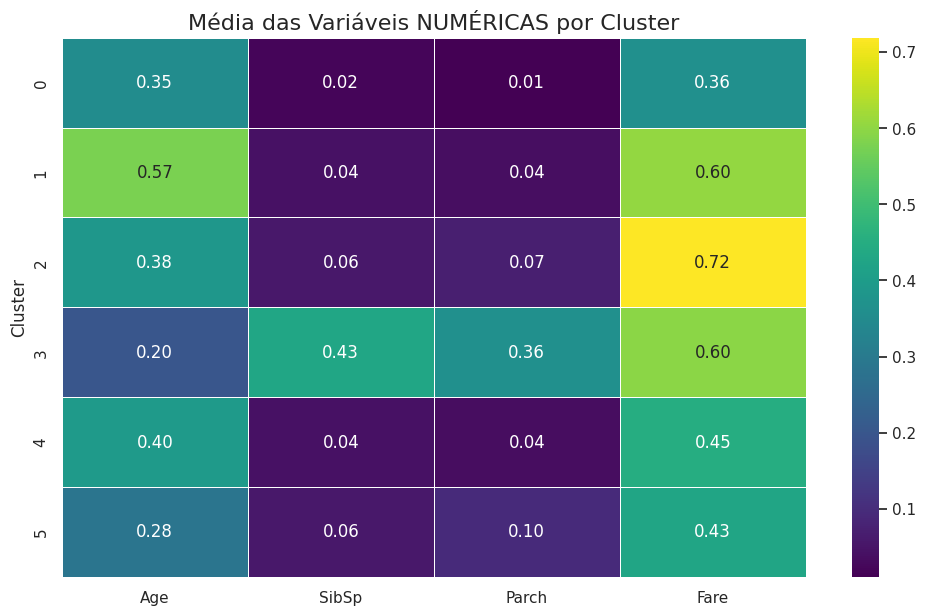

In [ ]:
# --- Análise do Perfil NUMÉRICO dos Clusters ---

# 1. Selecionar as colunas numéricas originais do nosso DataFrame principal.
dados_numericos_originais = X_final_df[colunas_numericas].copy()

# 2. Adicionar os rótulos de cluster corretos (do K-Prototypes treinado nos dados originais).
dados_numericos_originais['cluster'] = clusters

# 3. Calcular a média de cada variável numérica para cada cluster.
cluster_means = dados_numericos_originais.groupby('cluster').mean()

# 4. Plotar o Heatmap das médias.
plt.figure(figsize=(12, 7))

# Heatmap das médias
sns.heatmap(
    cluster_means,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    linewidths=.5
)

plt.title('Média das Variáveis NUMÉRICAS por Cluster', fontsize=16)
plt.ylabel('Cluster', fontsize=12)
plt.show()

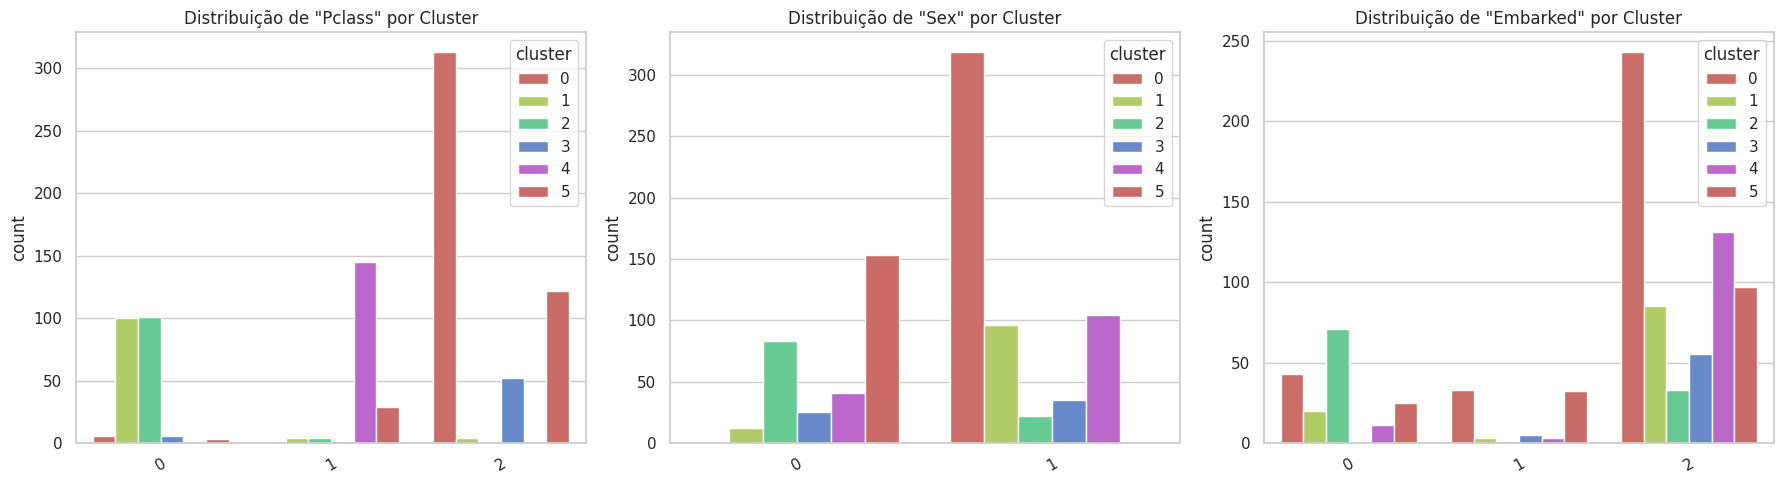

In [ ]:
# --- Análise do Perfil CATEGÓRICO dos Clusters (Lado a Lado) ---

dados_categoricos_originais = X_final_df[colunas_categoricas].copy()
dados_categoricos_originais['cluster'] = clusters

n_cols = len(colunas_categoricas)
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(18, 5))

for i, coluna in enumerate(colunas_categoricas):
    ax = axes[i]
    sns.countplot(
        data=dados_categoricos_originais,
        x=coluna,
        hue='cluster',
        palette='hls',
        ax=ax
    )
    ax.set_title(f'Distribuição de "{coluna}" por Cluster', fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)

# Ajusta o espaçamento entre os gráficos para evitar sobreposição
plt.tight_layout()
plt.show()

### Experimento : Estratégia de Redução de Dimensionalidade para Dados Mistos

Para reduzir a dimensionalidade do nosso dataset `df_processado`, que contém dados mistos, optamos por uma estratégia de análise separada para garantir máxima interpretabilidade dos resultados.

Nossa abordagem consistiu em duas frentes:
1.  **PCA (Principal Component Analysis):** Aplicado exclusivamente às colunas numéricas para sintetizar sua variância em um "Componente Numérico".
2.  **MCA (Multiple Correspondence Analysis):** Aplicado às colunas categóricas para gerar um "Componente Categórico" que resume as associações entre elas.

Essa separação resultou em dois eixos "puros", permitindo analisar o impacto de cada tipo de dado de forma independente na visualização final.

Uma alternativa comum a este método é o **FAMD (Factor Analysis of Mixed Data)**. Diferente da nossa estratégia, o FAMD analisa o dataset de forma unificada e cria componentes "híbridos" que são uma síntese da variância de ambos os tipos de dados. Enquanto nossa abordagem PCA + MCA oferece eixos mais claros e interpretáveis, o FAMD fornece uma visão mais holística da estrutura conjunta dos dados.

In [ ]:
dados_numericos = df_processado[colunas_numericas]
dados_categoricos = df_processado[colunas_categoricas]

# 2. Redução de dimensionalidade dos dados numéricos (PCA)
# Aplicando o PCA diretamente, pois os dados já estão prontos.
pca = PCA(n_components=1, random_state=42)
componente_numerico = pca.fit_transform(dados_numericos)

# 3. Redução de dimensionalidade dos dados categóricos (MCA)
mca = MCA(n_components=1, random_state=42)
componente_categorico = mca.fit_transform(dados_categoricos)

# 4. Unir os resultados em um novo DataFrame
df_reduzido = pd.DataFrame({
    'PCA': componente_numerico.flatten(),
    'MCA': componente_categorico.iloc[:, 0].values
})

print("Dados após redução com PCA e MCA:")
print(df_reduzido.head())

Dados após redução com PCA e MCA:
        PCA       MCA
0 -0.035791 -0.537422
1  0.072838  1.689337
2 -0.117502 -0.147973
3  0.062416  0.801964
4 -0.158832 -0.537422


In [ ]:
# --- Análise do Componente Numérico (PCA) ---
# (Esta seção está correta e não muda)
print("--- Análise do Componente Numérico (PCA) ---")

var_exp_pca = pca.explained_variance_ratio_[0]
print(f"\nVariância dos dados NUMÉRICOS explicada: {var_exp_pca:.2%}")

contrib_pca = pd.Series(pca.components_[0]**2, index=colunas_numericas, name="Contribuição PCA")
print("\nContribuição das variáveis numéricas:")
print(contrib_pca.sort_values(ascending=False))


# --- Análise do Componente Categórico (MCA) ---
# A alteração está na linha print() abaixo.
print("\n\n--- Análise do Componente Categórico (MCA) ---")

# Extraímos o valor da inércia, que já é uma string (ex: "27.28%").
inercia_exp_mca_str = mca.eigenvalues_summary.iloc[0, 1]

# AJUSTE: Removemos a formatação ':.2%' porque a variável já é um texto.
print(f"\nInércia dos dados CATEGÓRICOS explicada: {inercia_exp_mca_str}")

# O restante do código não muda.
contrib_mca = mca.column_contributions_.iloc[:, 0]
contrib_mca.name = "Contribuição MCA (Componente 0)"
print("\nContribuição das variáveis categóricas para o Componente 0:")
print(contrib_mca.sort_values(ascending=False))

--- Análise do Componente Numérico (PCA) ---

Variância dos dados NUMÉRICOS explicada: 41.21%

Contribuição das variáveis numéricas:
SibSp    0.309064
Fare     0.280558
Parch    0.269086
Age      0.141292
Name: Contribuição PCA, dtype: float64


--- Análise do Componente Categórico (MCA) ---

Inércia dos dados CATEGÓRICOS explicada: 27.28%

Contribuição das variáveis categóricas para o Componente 0:
Pclass__0      0.342483
Embarked__0    0.322746
Pclass__2      0.114964
Embarked__1    0.069151
Sex__0         0.067246
Embarked__2    0.040383
Sex__1         0.036595
Pclass__1      0.006431
Name: Contribuição MCA (Componente 0), dtype: float64


In [ ]:
# Treinamento do K-Prototypes
X_kproto = df_reduzido.copy()
indice_coluna_categorica = [1]

kprototypes = KPrototypes(n_clusters=6)
y_kprototypes = kprototypes.fit_predict(X_kproto, categorical = indice_coluna_categorica)


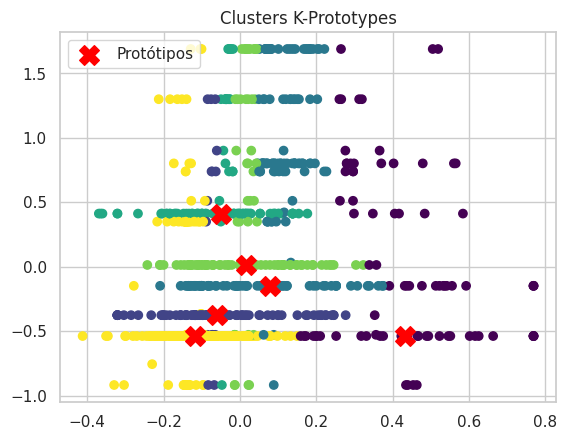

In [ ]:
# Visualização dos clusters
plt.scatter(X_kproto.values[:, 0], X_kproto.values[:, 1], c=y_kprototypes, cmap='viridis')
plt.scatter(kprototypes.cluster_centroids_[:, 0], kprototypes.cluster_centroids_[:, 1],
            s=200, c='red', label='Protótipos', marker='X')

plt.title('Clusters K-Prototypes')
plt.legend()
plt.show()

/tmp/ipython-input-819206668.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


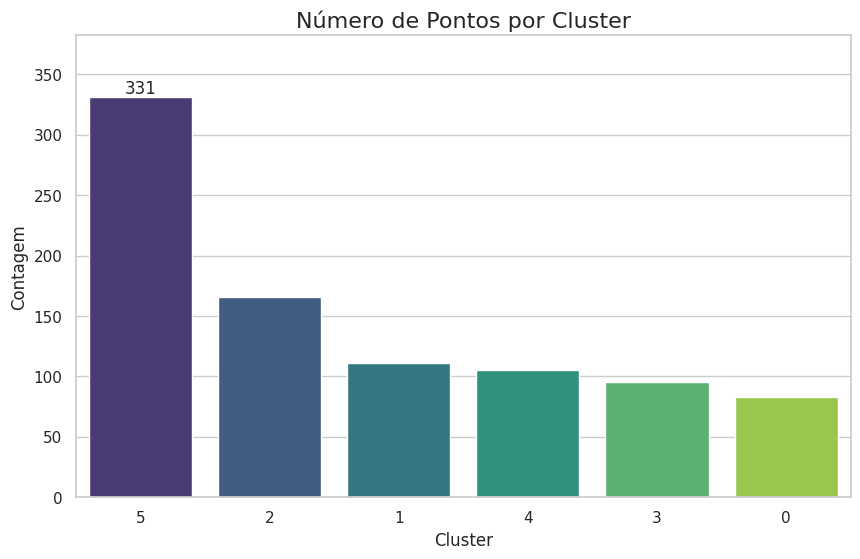

In [ ]:
# 1. Criar um DataFrame simples contendo os rótulos dos clusters.
df_contagem = pd.DataFrame({'cluster': y_kprototypes})

# 2. Criar o gráfico de contagem (countplot).
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_contagem,
    x='cluster',
    palette='viridis',
    order = df_contagem['cluster'].value_counts().index # Ordena as barras da maior para a menor
)

# Adiciona os números no topo de cada barra.
ax.bar_label(ax.containers[0])

# 3. Adicionar títulos e rótulos.
plt.title('Número de Pontos por Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.ylim(0, ax.get_ylim()[1] * 1.1)
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Usaremos os dados normalizados do K-Means (apenas variáveis numéricas)
X_dbscan = X_kmeans.copy()

# Método 1: K-distance plot para determinar eps
def plot_k_distance(X, k=4):
    """
    Plota o K-distance graph para ajudar a determinar o valor de eps
    k geralmente é definido como min_samples - 1
    """
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)

    # Pega a distância do k-ésimo vizinho mais próximo
    distances = np.sort(distances[:, k-1], axis=0)[::-1]

    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'{k}-distance Plot')
    plt.xlabel('Pontos ordenados por distância')
    plt.ylabel(f'{k}-ésima distância mais próxima')
    plt.grid(True, alpha=0.3)

    # Adiciona linha de referência visual
    knee_point = len(distances) // 4  # Aproximação do "joelho"
    plt.axhline(y=distances[knee_point], color='red', linestyle='--',
                label=f'Sugestão eps ≈ {distances[knee_point]:.3f}')
    plt.legend()
    plt.show()

    return distances


Analisando para min_samples = 4


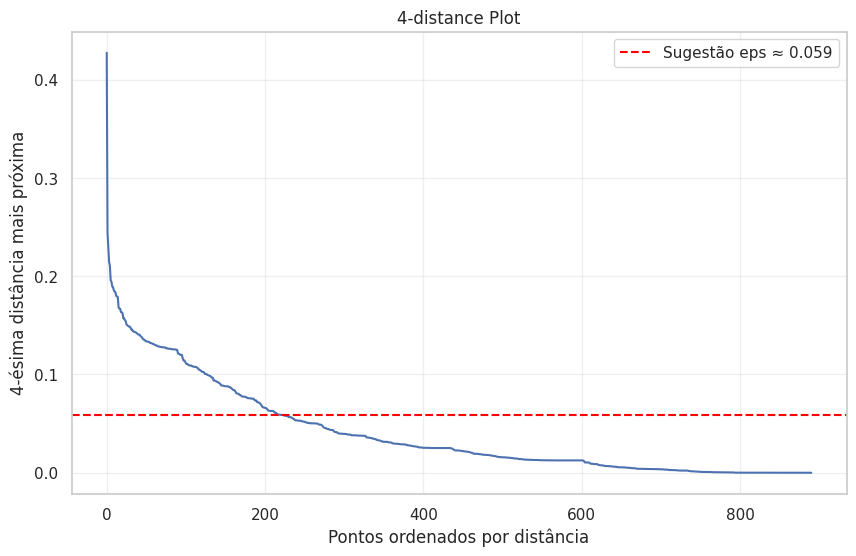

Sugestão de eps: 0.059

Analisando para min_samples = 5


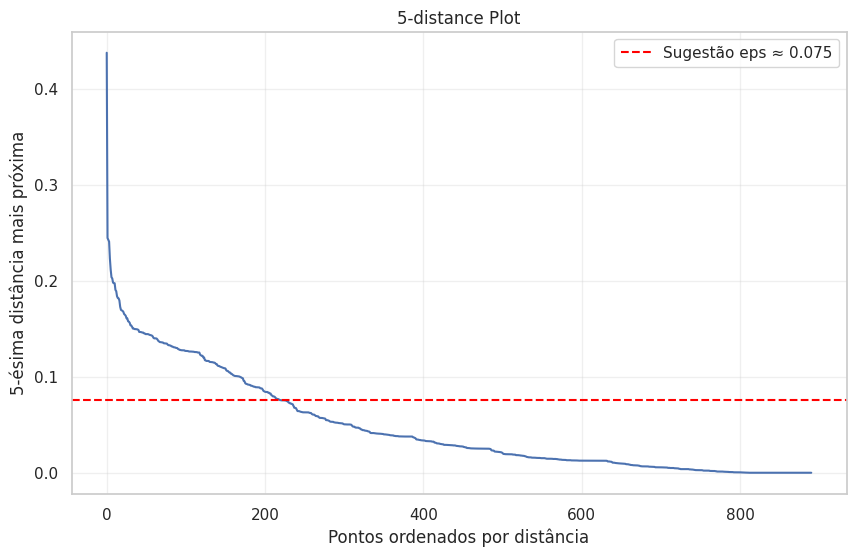

Sugestão de eps: 0.075

Analisando para min_samples = 6


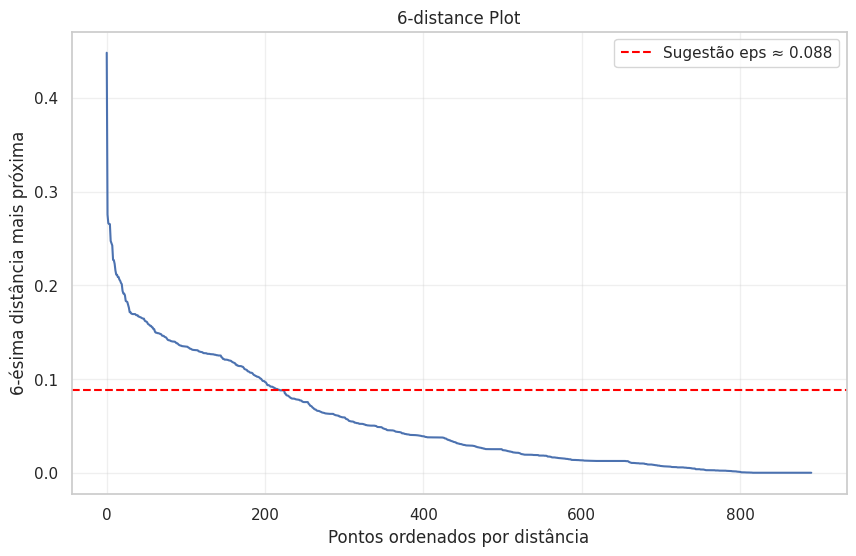

Sugestão de eps: 0.088

Analisando para min_samples = 7


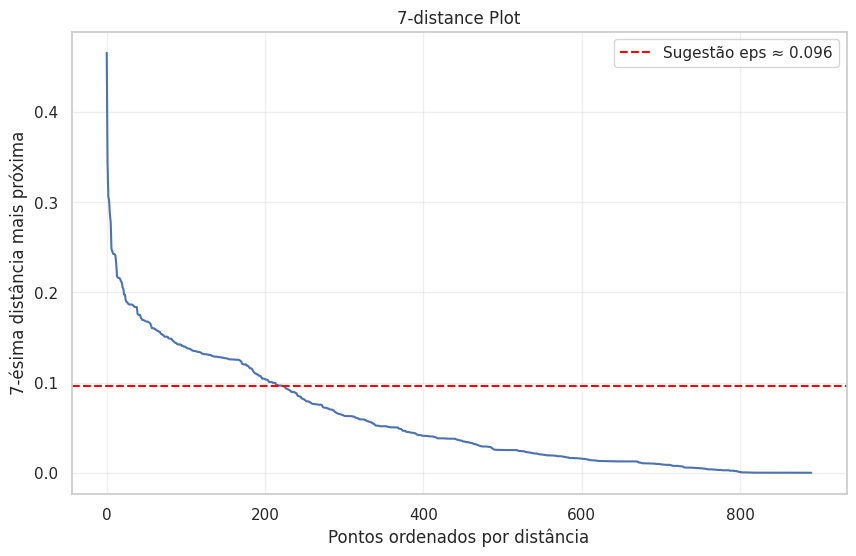

Sugestão de eps: 0.096

Analisando para min_samples = 8


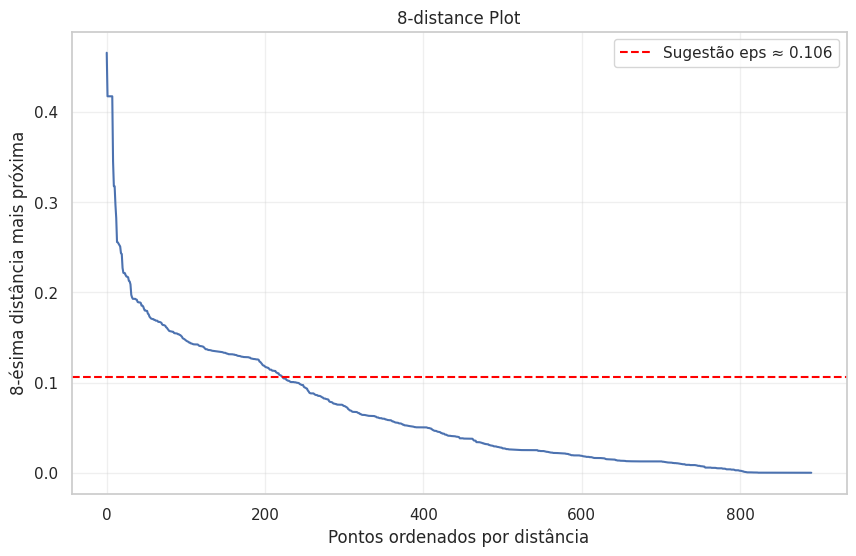

Sugestão de eps: 0.106

Analisando para min_samples = 9


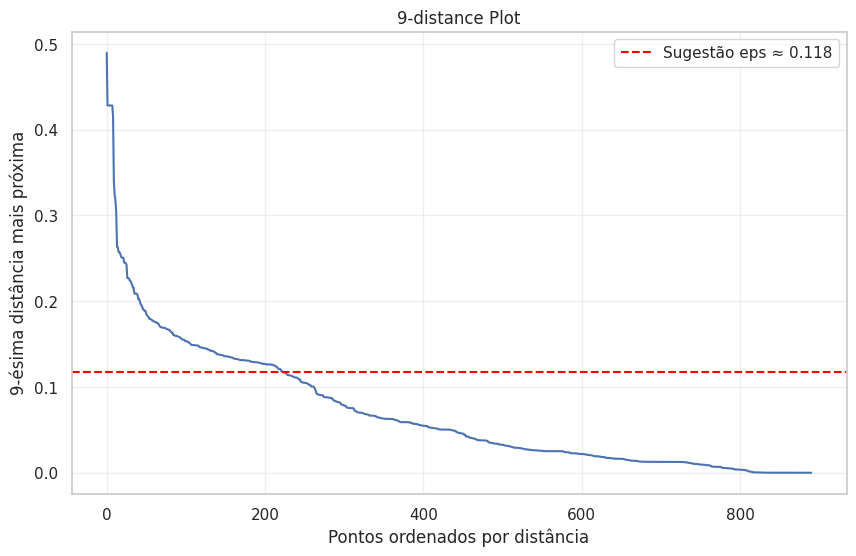

Sugestão de eps: 0.118



In [ ]:
# Plotando para diferentes valores de k (min_samples)
for k in range(4, 10):
    print(f"Analisando para min_samples = {k}")
    distances = plot_k_distance(X_dbscan, k)
    print(f"Sugestão de eps: {distances[len(distances)//4]:.3f}\n")


### Otimização de parâmetros

In [ ]:
"""### Grid Search para otimização de parâmetros"""

def avaliar_dbscan(X, eps_range, min_samples_range):
    """
    Avalia diferentes combinações de parâmetros para DBSCAN
    """
    resultados = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            try:
                # Aplica DBSCAN
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(X)

                # Calcula métricas apenas se houver mais de 1 cluster
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise = list(labels).count(-1)

                if n_clusters > 1:
                    # Calcula silhouette apenas para pontos que não são ruído
                    mask = labels != -1
                    if np.sum(mask) > 1:
                        silhouette = silhouette_score(X[mask], labels[mask])
                    else:
                        silhouette = -1
                else:
                    silhouette = -1

                resultados.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette': silhouette,
                    'labels': labels
                })

            except Exception as e:
                # Em caso de erro, adiciona resultado inválido
                resultados.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': 0,
                    'n_noise': len(X),
                    'silhouette': -1,
                    'labels': np.full(len(X), -1)
                })

    return pd.DataFrame(resultados)


In [ ]:
# Define ranges para teste baseados na análise do k-distance
eps_range = np.arange(0.05, 0.2, 0.025)
min_samples_range = range(4, 8)

print("Executando Grid Search para DBSCAN...")
resultados_grid = avaliar_dbscan(X_dbscan, eps_range, min_samples_range)

# Filtra resultados válidos (com clusters e silhouette > 0)
resultados_validos = resultados_grid[
    (resultados_grid['n_clusters'] > 1) &
    (resultados_grid['silhouette'] > 0)
]

if len(resultados_validos) > 0:
    # Encontra a melhor combinação baseada no silhouette score
    melhor_resultado = resultados_validos.loc[resultados_validos['silhouette'].idxmax()]

    print("Melhores parâmetros encontrados:")
    print(f"eps = {melhor_resultado['eps']:.3f}")
    print(f"min_samples = {melhor_resultado['min_samples']}")
    print(f"Número de clusters: {melhor_resultado['n_clusters']}")
    print(f"Pontos de ruído: {melhor_resultado['n_noise']}")
    print(f"Silhouette Score: {melhor_resultado['silhouette']:.3f}")
else:
    print("Nenhuma combinação válida encontrada. Usando parâmetros padrão.")
    melhor_resultado = {'eps': 0.3, 'min_samples': 4}


Executando Grid Search para DBSCAN...
Melhores parâmetros encontrados:
eps = 0.175
min_samples = 7
Número de clusters: 3
Pontos de ruído: 21
Silhouette Score: 0.383


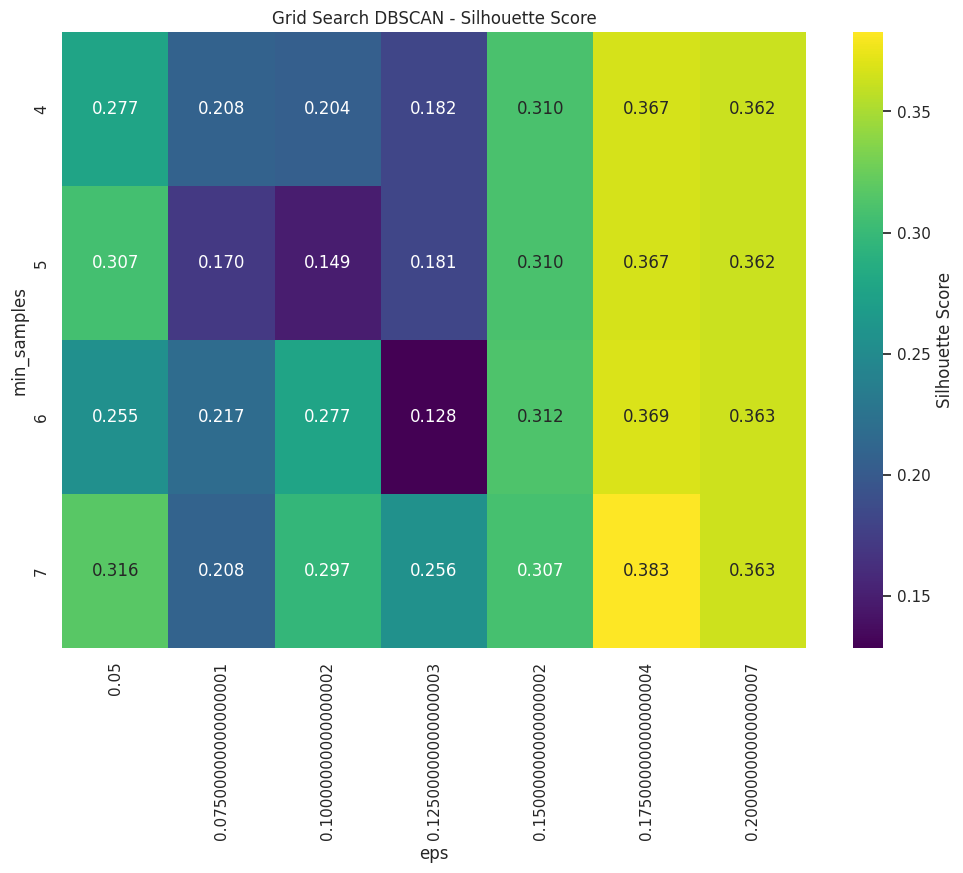

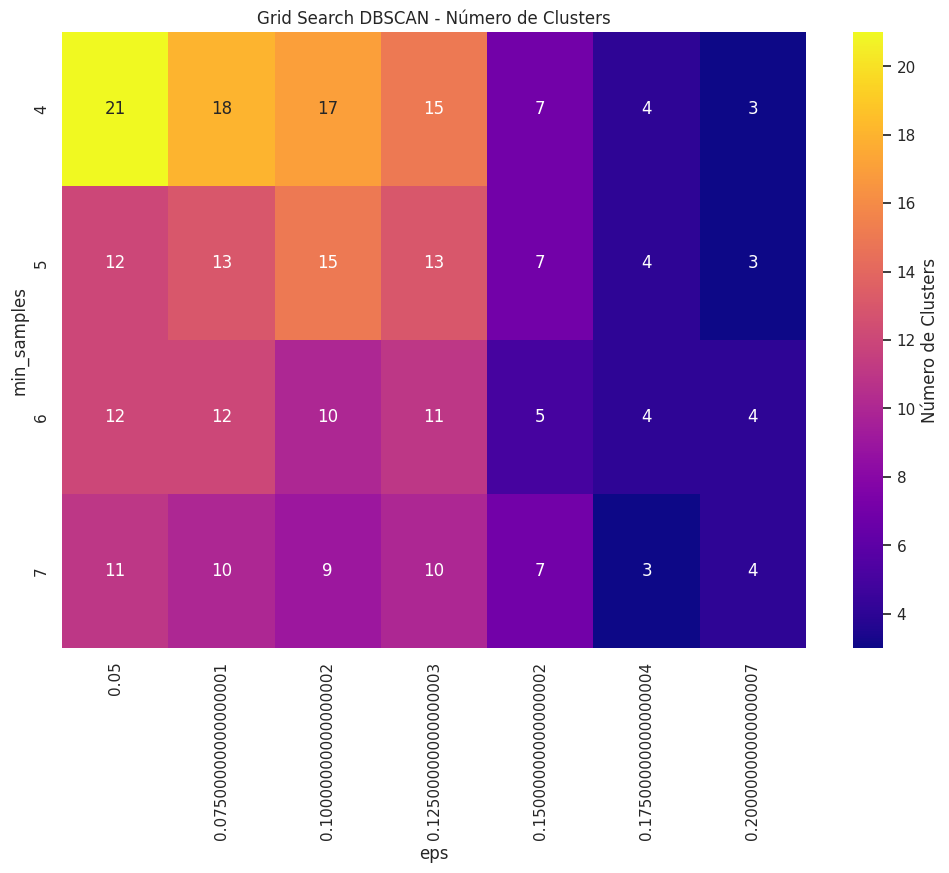

In [ ]:
"""### Visualização da otimização de parâmetros"""

# Criar heatmap dos resultados
if len(resultados_validos) > 0:
    # Pivot table para heatmap
    heatmap_data = resultados_grid.pivot(index='min_samples', columns='eps', values='silhouette')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis',
                cbar_kws={'label': 'Silhouette Score'})
    plt.title('Grid Search DBSCAN - Silhouette Score')
    plt.xlabel('eps')
    plt.ylabel('min_samples')
    plt.show()

    # Gráfico do número de clusters
    heatmap_clusters = resultados_grid.pivot(index='min_samples', columns='eps', values='n_clusters')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_clusters, annot=True, fmt='d', cmap='plasma',
                cbar_kws={'label': 'Número de Clusters'})
    plt.title('Grid Search DBSCAN - Número de Clusters')
    plt.xlabel('eps')
    plt.ylabel('min_samples')
    plt.show()


### Melhor resultado DBSCAN

In [ ]:
"""### Aplicando DBSCAN com os melhores parâmetros"""

# Treina o modelo final
eps_final = melhor_resultado['eps']
min_samples_final = melhor_resultado['min_samples']

dbscan_final = DBSCAN(eps=eps_final, min_samples=min_samples_final)
labels_dbscan = dbscan_final.fit_predict(X_dbscan)

In [ ]:
#Estatísticas do resultado final
n_clusters_final = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_final = list(labels_dbscan).count(-1)

print(f"Resultado Final do DBSCAN:")
print(f"Número de clusters: {n_clusters_final}")
print(f"Número de pontos de ruído: {n_noise_final}")
print(f"Porcentagem de ruído: {n_noise_final/len(labels_dbscan)*100:.1f}%")


Resultado Final do DBSCAN:
Número de clusters: 3
Número de pontos de ruído: 21
Porcentagem de ruído: 2.4%


In [ ]:
# Calcula métricas finais
if n_clusters_final > 1:
    mask_no_noise = labels_dbscan != -1
    if np.sum(mask_no_noise) > 1:
        silhouette_final = silhouette_score(X_dbscan[mask_no_noise], labels_dbscan[mask_no_noise])
        print(f"Silhouette Score: {silhouette_final:.3f}")

Silhouette Score: 0.383


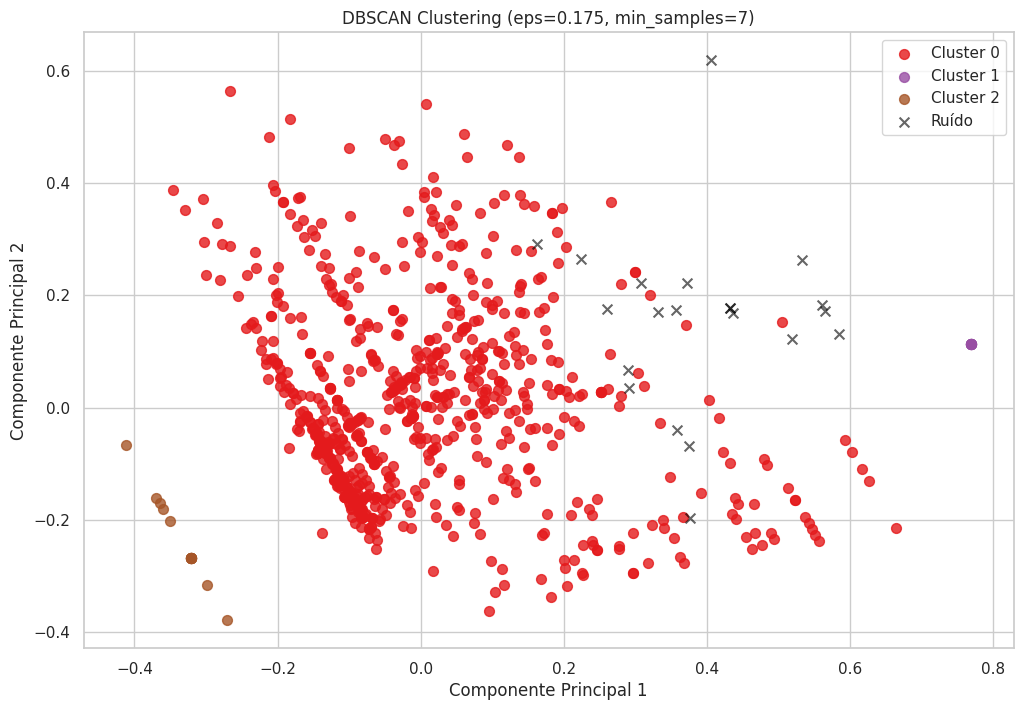

In [ ]:
"""### Visualização dos clusters DBSCAN com PCA"""

# Aplicar PCA nos dados do DBSCAN para visualização
pca_dbscan = PCA(n_components=2)
X_dbscan_pca = pca_dbscan.fit_transform(X_dbscan)

# Criar DataFrame para visualização
df_dbscan_viz = pd.DataFrame(X_dbscan_pca, columns=['PCA1', 'PCA2'])
df_dbscan_viz['cluster'] = labels_dbscan

# Plot dos clusters
plt.figure(figsize=(12, 8))
unique_labels = set(labels_dbscan)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Pontos de ruído em preto
        class_member_mask = (labels_dbscan == k)
        xy = X_dbscan_pca[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c='black', marker='x',
                   alpha=0.6, label='Ruído')
    else:
        class_member_mask = (labels_dbscan == k)
        xy = X_dbscan_pca[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col],
                   alpha=0.8, label=f'Cluster {k}')

plt.title(f'DBSCAN Clustering (eps={eps_final:.3f}, min_samples={min_samples_final})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


### Distribuição dos clusters

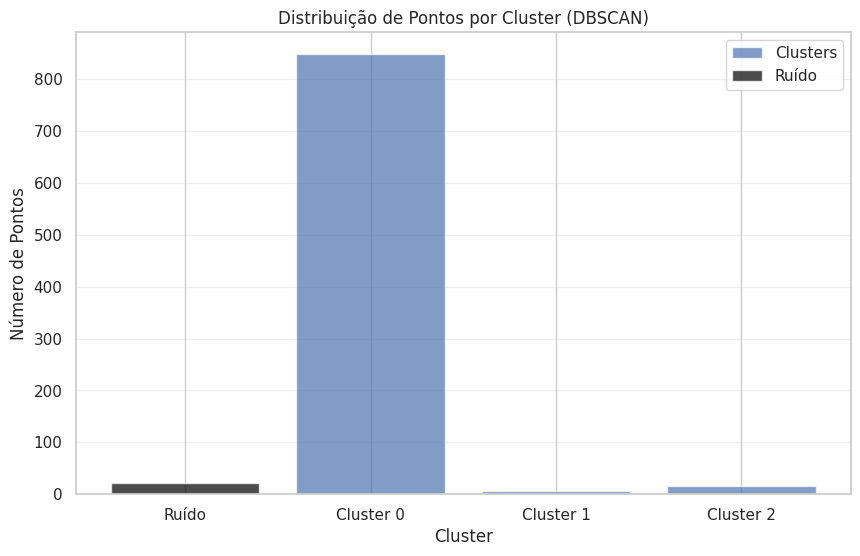

In [ ]:
"""### Distribuição dos clusters DBSCAN"""

plt.figure(figsize=(10, 6))
unique_labels_counts = pd.Series(labels_dbscan).value_counts().sort_index()

# Separa ruído dos clusters
if -1 in unique_labels_counts.index:
    noise_count = unique_labels_counts[-1]
    cluster_counts = unique_labels_counts[unique_labels_counts.index != -1]

    # Plot clusters
    plt.bar(cluster_counts.index, cluster_counts.values, alpha=0.7, label='Clusters')
    # Plot ruído separadamente
    plt.bar([-1], [noise_count], color='black', alpha=0.7, label='Ruído')
else:
    plt.bar(unique_labels_counts.index, unique_labels_counts.values, alpha=0.7)

xticks = list(cluster_counts.index) + [-1]
xlabels = [f'Cluster {i}' for i in cluster_counts.index] + ['Ruído']
plt.xticks(xticks, xlabels)
plt.title('Distribuição de Pontos por Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Número de Pontos')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
cluster_counts

,count
0,848
1,7
2,15


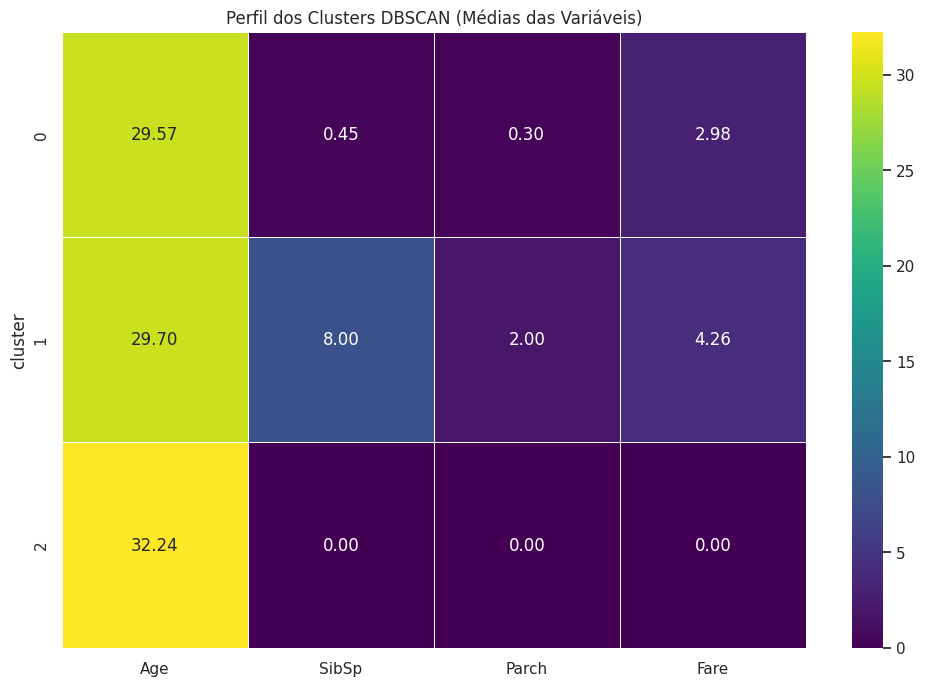

Estatísticas dos Clusters DBSCAN:
            Age  SibSp  Parch   Fare
cluster                             
0        29.565  0.452  0.301  2.977
1        29.699  8.000  2.000  4.256
2        32.240  0.000  0.000  0.000


In [ ]:
"""### Perfil dos clusters DBSCAN

Análise das características dos clusters encontrados pelo DBSCAN usando os dados originais
"""

# Criar DataFrame com dados originais e clusters
dados_dbscan_analise = dataset.iloc[:, 2:6].copy()  # Apenas variáveis numéricas originais
feature_names_dbscan = ['Age', 'SibSp', 'Parch', 'Fare']
dados_dbscan_analise.columns = feature_names_dbscan
dados_dbscan_analise['cluster'] = labels_dbscan

# Separar clusters válidos (excluir ruído para a análise)
clusters_validos = dados_dbscan_analise[dados_dbscan_analise['cluster'] != -1]

if len(clusters_validos) > 0:
    # Calcular médias por cluster
    cluster_means_dbscan = clusters_validos.groupby('cluster')[feature_names_dbscan].mean()

    # Heatmap das médias
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means_dbscan, annot=True, fmt='.2f', cmap='viridis', linewidths=.5)
    plt.title('Perfil dos Clusters DBSCAN (Médias das Variáveis)')
    plt.show()

    # Estatísticas descritivas por cluster
    print("Estatísticas dos Clusters DBSCAN:")
    print(cluster_means_dbscan.round(3))
else:
    print("Não há clusters válidos para análise (apenas ruído)")
